# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&units=imperial"+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

# Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bangkalan
Processing Record 2 of Set 1 | tepalcatepec
Processing Record 3 of Set 1 | santo antonio do taua
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | dakoro
Processing Record 6 of Set 1 | vishnyeva
Processing Record 7 of Set 1 | tindouf
Processing Record 8 of Set 1 | agat village
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | al hadd
Processing Record 13 of Set 1 | recani
Processing Record 14 of Set 1 | beyneu
Processing Record 15 of Set 1 | yeppoon
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | quellon
Processing Record 18 of Set 1 | pingnan
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | stanley
Processing Record 23 of Set 1 | 

In [71]:
#get json response and print to better map the points for iteration
city_weather=requests.get(city_url).json()
print(json.dumps(city_weather, indent=4))

{
    "coord": {
        "lon": 131.9608,
        "lat": 60.8953
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -22.7,
        "feels_like": -35.3,
        "temp_min": -22.7,
        "temp_max": -22.7,
        "pressure": 1033,
        "humidity": 94,
        "sea_level": 1033,
        "grnd_level": 1012
    },
    "visibility": 1937,
    "wind": {
        "speed": 6.62,
        "deg": 291,
        "gust": 18.9
    },
    "clouds": {
        "all": 100
    },
    "dt": 1702178201,
    "sys": {
        "country": "RU",
        "sunrise": 1702167027,
        "sunset": 1702187941
    },
    "timezone": 32400,
    "id": 2027786,
    "name": "Amga",
    "cod": 200
}


In [72]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [73]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bangkalan,-7.0455,112.7351,87.75,65,85,1.66,ID,1702178085
1,tepalcatepec,19.1833,-102.8500,75.38,61,0,2.33,MX,1702178085
2,santo antonio do taua,-1.1519,-48.1294,78.75,92,79,3.24,BR,1702178085
3,afaahiti,-17.7500,-149.2833,84.07,85,90,23.15,PF,1702178085
4,dakoro,14.5106,6.7650,66.34,18,100,6.20,NE,1702178085


In [74]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [75]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangkalan,-7.0455,112.7351,87.75,65,85,1.66,ID,1702178085
1,tepalcatepec,19.1833,-102.8500,75.38,61,0,2.33,MX,1702178085
2,santo antonio do taua,-1.1519,-48.1294,78.75,92,79,3.24,BR,1702178085
3,afaahiti,-17.7500,-149.2833,84.07,85,90,23.15,PF,1702178085
4,dakoro,14.5106,6.7650,66.34,18,100,6.20,NE,1702178085


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

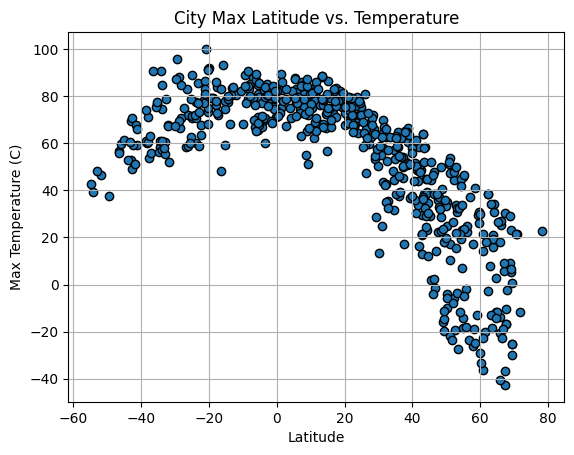

In [76]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City Max Latitude vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

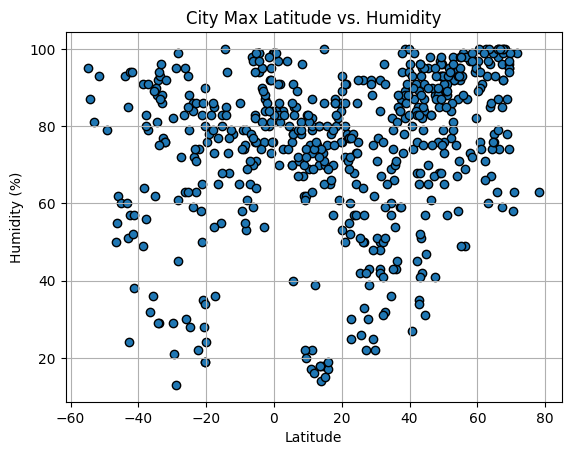

In [77]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Max Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

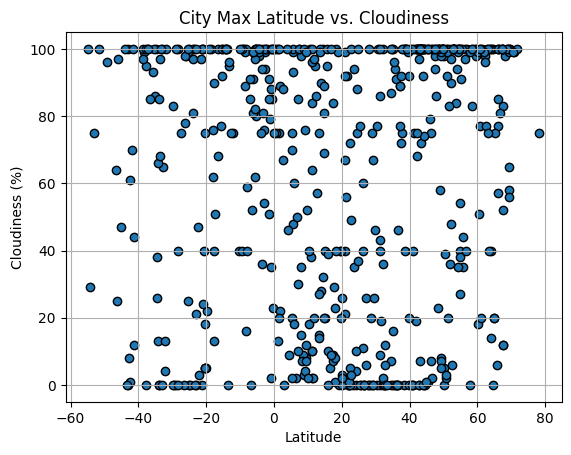

In [78]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Max Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

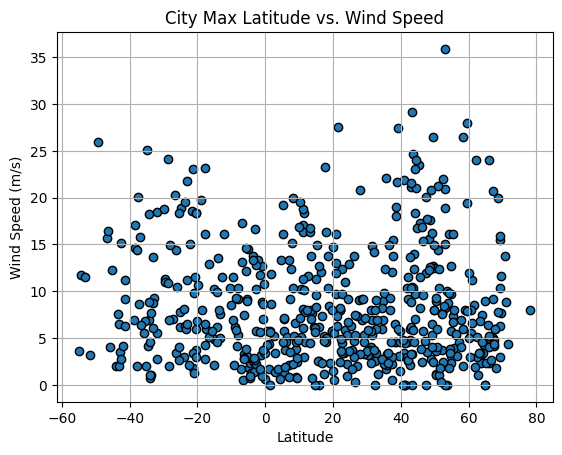

In [79]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title('City Max Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df
northern_hemi_df = northern_hemi_df[northern_hemi_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tepalcatepec,19.1833,-102.8500,75.38,61,0,2.33,MX,1702178085
4,dakoro,14.5106,6.7650,66.34,18,100,6.20,NE,1702178085
5,vishnyeva,54.7122,26.5225,23.29,95,100,9.69,BY,1702177830
6,tindouf,27.6711,-8.1474,62.71,30,0,9.08,DZ,1702178086
7,agat village,13.3886,144.6585,88.74,70,75,13.80,GU,1702178086


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df
southern_hemi_df = southern_hemi_df[southern_hemi_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangkalan,-7.0455,112.7351,87.75,65,85,1.66,ID,1702178085
2,santo antonio do taua,-1.1519,-48.1294,78.75,92,79,3.24,BR,1702178085
3,afaahiti,-17.7500,-149.2833,84.07,85,90,23.15,PF,1702178085
14,yeppoon,-23.1333,150.7333,85.78,63,21,21.79,AU,1702178087
16,quellon,-43.1167,-73.6167,52.99,85,100,6.46,CL,1702178088


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7123410706341499


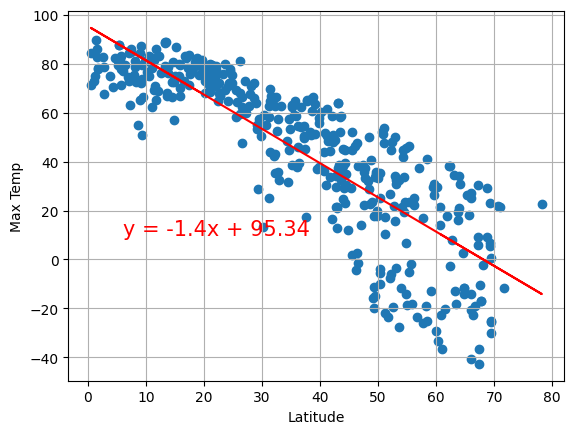

In [83]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat'].astype(float)
y = northern_hemi_df['Max Temp'].astype(float)

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.31798411205717586


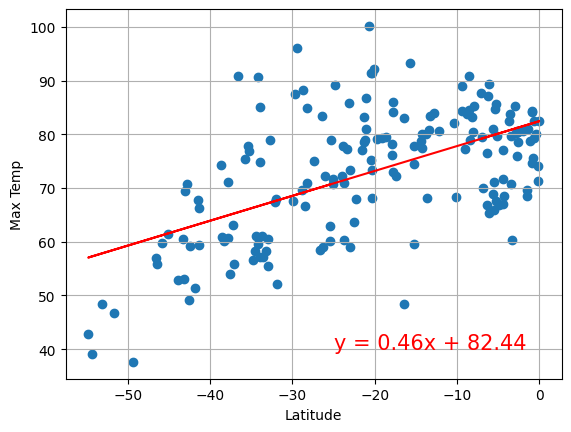

In [92]:
x1 = southern_hemi_df['Lat'].astype(float)
y1 = southern_hemi_df['Max Temp'].astype(float)

(slope1, intercept1, r_value1, p_value1, std_err1) = linregress(x1, y1)
regress_values1 = x1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

plt.scatter(x1,y1)
plt.plot(x1,regress_values1,"r-")
plt.annotate(line_eq1,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value1**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a negative association between latitude in the northern hemisphere and max temps. Given the Pearson's R-Value of .71, this means we do have a strong relationship between latitude in the northern hemisphere and max temps.

Conversely, there appears to be a postive association between latitude in the southern hemisphere and max temps, but our data shows a lot of variance. Given the Pearson's R-Value of .31, this means we have weak-to-no relationship between latitude in the southern hemisphere and max temps.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.1066579642483912


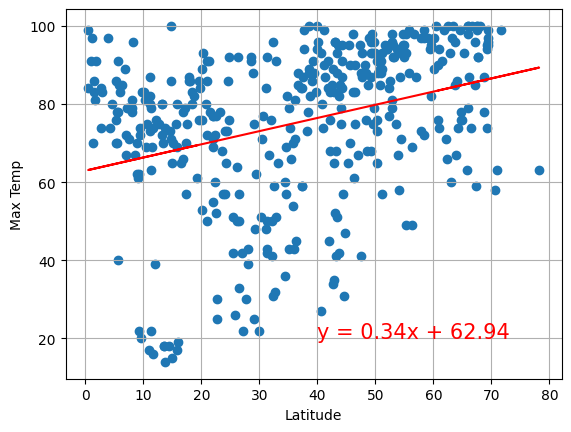

In [85]:
# Northern Hemisphere
x2 = northern_hemi_df['Lat'].astype(float)
y2 = northern_hemi_df['Humidity'].astype(float)

(slope2, intercept2, r_value2, p_value2, std_err2) = linregress(x2, y2)
regress_values2 = x2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

plt.scatter(x2,y2)
plt.plot(x2,regress_values2,"r-")
plt.annotate(line_eq2,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value2**2}")

# Show plot
plt.show()

R squared: 0.0486956242752021


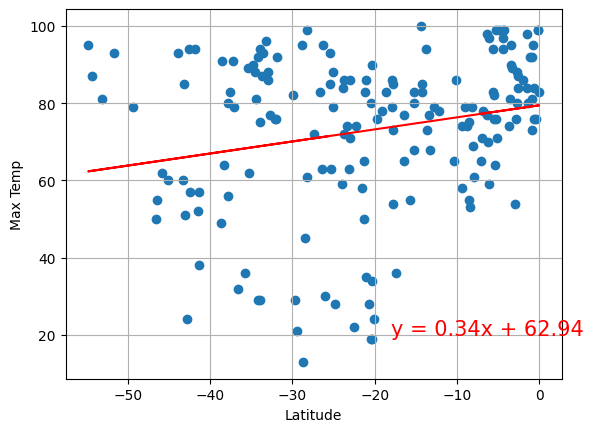

In [86]:
# Southern Hemisphere
x3 = southern_hemi_df['Lat'].astype(float)
y3 = southern_hemi_df['Humidity'].astype(float)

(slope3, intercept3, r_value3, p_value3, std_err3) = linregress(x3, y3)
regress_values3 = x3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

plt.scatter(x3,y3)
plt.plot(x3,regress_values3,"r-")
plt.annotate(line_eq3,(-18,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value3**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both above graphs appear to have a postive association between latitudes in their respective hemisphere and humidity(with high variance in our plotted points), but with r-values of ~.11 and ~.05, respectively, we can conclude that there is not a relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.09246558540839986


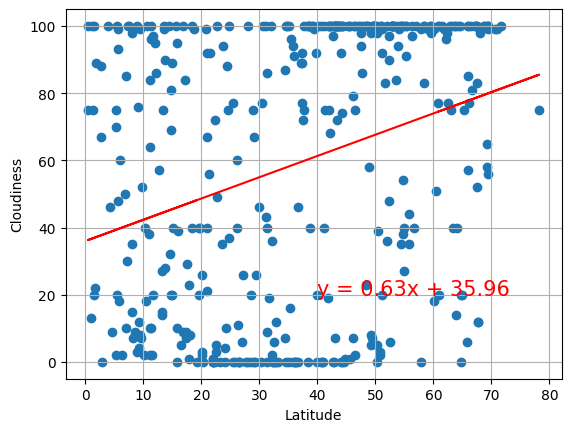

In [87]:
# Northern Hemisphere
# Northern Hemisphere
x4 = northern_hemi_df['Lat'].astype(float)
y4 = northern_hemi_df['Cloudiness'].astype(float)

(slope4, intercept4, r_value4, p_value4, std_err4) = linregress(x4, y4)
regress_values4 = x4 * slope4 + intercept4
line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

plt.scatter(x4,y4)
plt.plot(x4,regress_values4,"r-")
plt.annotate(line_eq4,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value4**2}")

# Show plot
plt.show()

R squared: 0.04279202679400668


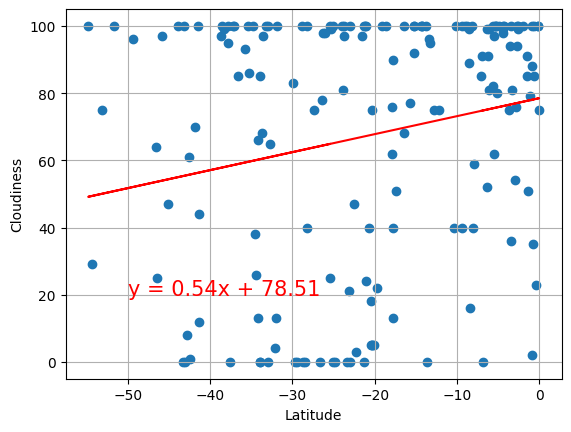

In [88]:
# Southern Hemisphere
x5 = southern_hemi_df['Lat'].astype(float)
y5 = southern_hemi_df['Cloudiness'].astype(float)

(slope5, intercept5, r_value5, p_value5, std_err5) = linregress(x5, y5)
regress_values5 = x5 * slope5 + intercept5
line_eq5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

plt.scatter(x5,y5)
plt.plot(x5,regress_values5,"r-")
plt.annotate(line_eq5,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value5**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both above graphs appear to have a postive association between latitudes in their respective hemisphere and cloudiness(with high variance in our plotted points), but with r-values of ~.09 and ~.04, respectively, we can conclude that there is not a relationship between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.005502863956541879


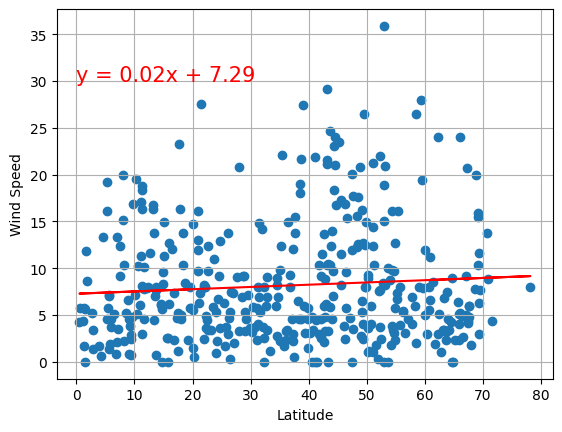

In [89]:
# Northern Hemisphere
x6 = northern_hemi_df['Lat'].astype(float)
y6 = northern_hemi_df['Wind Speed'].astype(float)

(slope6, intercept6, r_value6, p_value6, std_err6) = linregress(x6, y6)
regress_values6 = x6 * slope6 + intercept6
line_eq6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

plt.scatter(x6,y6)
plt.plot(x6,regress_values6,"r-")
plt.annotate(line_eq6,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value6**2}")

# Show plot
plt.show()

R squared: 0.032351828036424654


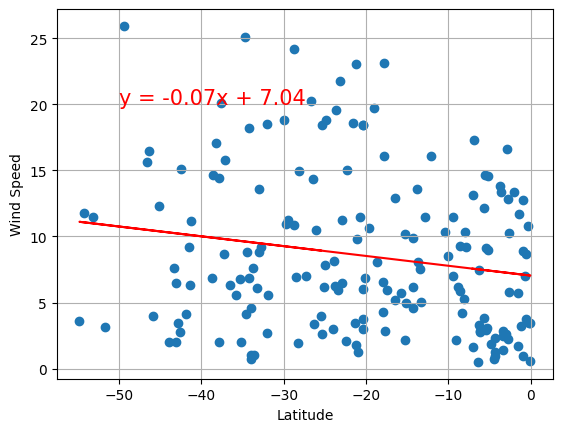

In [90]:
# Southern Hemisphere
x7 = southern_hemi_df['Lat'].astype(float)
y7 = southern_hemi_df['Wind Speed'].astype(float)

(slope7, intercept7, r_value7, p_value7, std_err7) = linregress(x7, y7)
regress_values7 = x7 * slope7 + intercept7
line_eq7 = "y = " + str(round(slope7,2)) + "x + " + str(round(intercept7,2))

plt.scatter(x7,y7)
plt.plot(x7,regress_values7,"r-")
plt.annotate(line_eq7,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Print r square value
print(f"R squared: {r_value7**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a postive association between latitude in the northern hemisphere and wind speed. Given the Pearson's R-Value of ~.01, this means we have no relationship between latitude in the northern hemisphere and wind speed.

Conversely, there appears to be a negative association between latitude in the southern hemisphere and wind speed, but our data shows a lot of variance. Given the Pearson's R-Value of .03, this means we have no relationship between latitude in the southern hemisphere and wind speed.